In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

In [11]:
df=pd.read_csv('Churn_Modelling.csv')
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [13]:
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


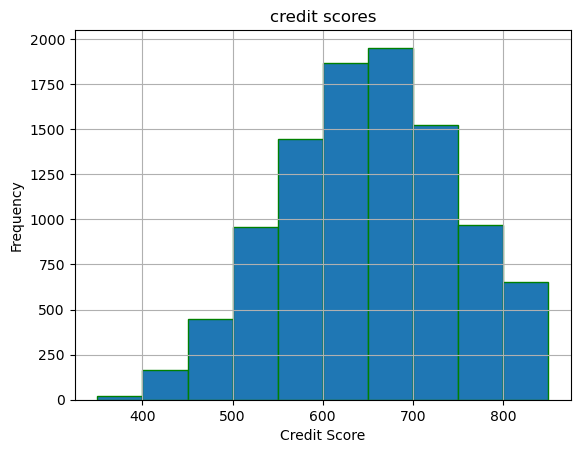

In [31]:
crscore=df['CreditScore']
plt.hist(crscore,bins=10,edgecolor='green')
plt.title('credit scores')
plt.xlabel('Credit Score')
plt.ylabel('Frequency')
plt.grid()
plt.show()

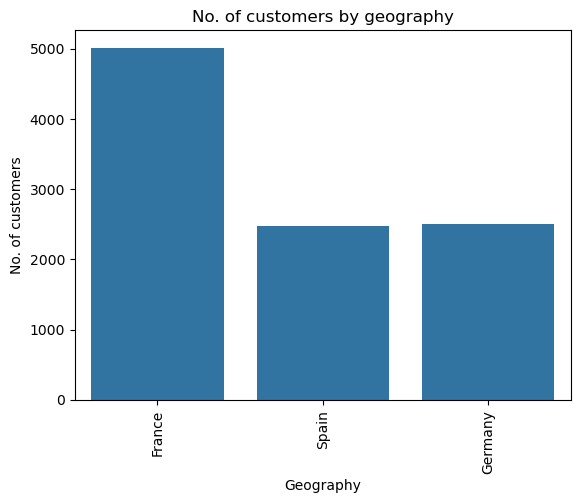

In [46]:
sns.countplot(x='Geography',data=df)
plt.title('No. of customers by geography')
plt.xlabel('Geography')
plt.ylabel('No. of customers')
plt.xticks(rotation=90)
plt.show()

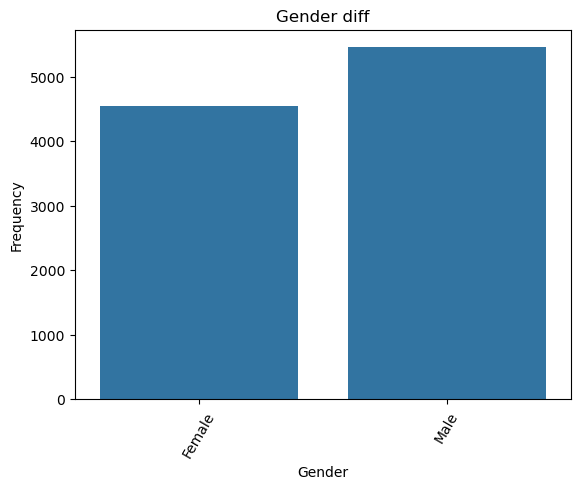

In [48]:
ge=df['Gender']
sns.countplot(x='Gender',data=df)
plt.title("Gender diff")
plt.xlabel('Gender')
plt.ylabel('Frequency')
plt.xticks(rotation=60)
plt.show()

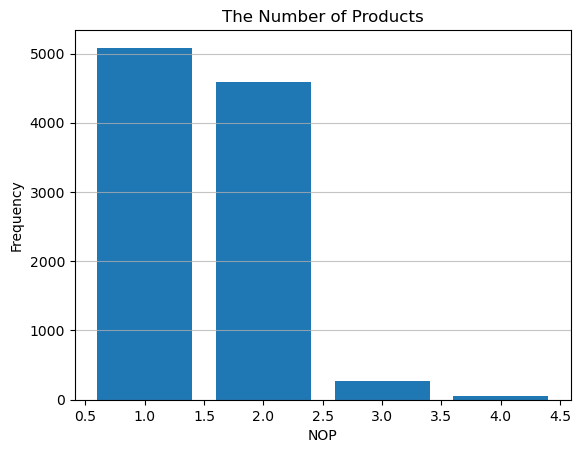

In [50]:
No_Products = df['NumOfProducts'].value_counts()
plt.bar(No_Products.index, No_Products.values)
plt.title('The Number of Products')
plt.xlabel('NOP')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)
plt.show()

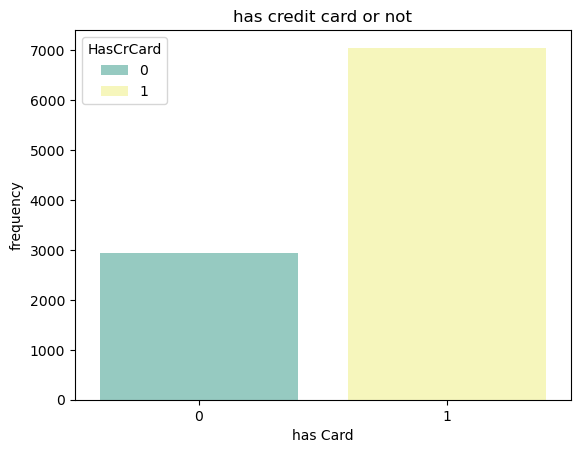

In [65]:
crcard=df['HasCrCard']
sns.countplot(x='HasCrCard',data=df,hue='HasCrCard',palette='Set3',legend=True)
plt.title('has credit card or not')
plt.xlabel('has Card')
plt.ylabel('frequency')
plt.show()

Text(0.5, 1.0, 'Active Member Analysis')

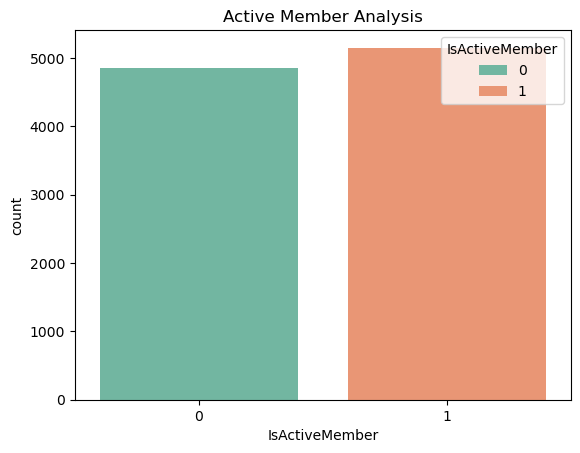

In [69]:
active=df['IsActiveMember']
sns.countplot(x='IsActiveMember',data=df,hue='IsActiveMember',palette='Set2')
plt.title('Active Member Analysis')


In [79]:
print(f'Probability of a customer being exited given they have a credit card, {round(df[(df["HasCrCard"] == 1) & (df["Exited"] == 1)].count()[0] / df[(df["Exited"] == 1)].count()[0] *100,2)} % ')
print(f'Probability of a customer being exited given they do not have a credit card, {round(df[(df["HasCrCard"] == 0) & (df["Exited"] == 1)].count()[0] / df[(df["Exited"] == 1)].count()[0] *100,2)} % ')

Probability of a customer being exited given they have a credit card, 69.91 % 
Probability of a customer being exited given they do not have a credit card, 30.09 % 


C:\Users\Aditya\AppData\Local\Temp\ipykernel_25032\407521935.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(f'Probability of a customer being exited given they have a credit card, {round(df[(df["HasCrCard"] == 1) & (df["Exited"] == 1)].count()[0] / df[(df["Exited"] == 1)].count()[0] *100,2)} % ')
C:\Users\Aditya\AppData\Local\Temp\ipykernel_25032\407521935.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(f'Probability of a customer being exited given they have a credit card, {round(df[(df["HasCrCard"] == 1) & (df["Exited"] == 1)].count()[0] / df[(df["Exited"] == 1)].count()[0] *100,2)} % ')
C:\Use

In [81]:
print(f'Probability of a customer being exited given they are activeMember, {round(df[(df["IsActiveMember"] == 1) & (df["Exited"] == 1)].count()[0] / df[(df["Exited"] == 1)].count()[0] *100,2)} % ')
print(f'Probability of a customer being exited given they are not active Member, {round(df[(df["IsActiveMember"] == 0) & (df["Exited"] == 1)].count()[0] / df[(df["Exited"] == 1)].count()[0] *100,2)} % ')

Probability of a customer being exited given they are activeMember, 36.08 % 
Probability of a customer being exited given they are not active Member, 63.92 % 


C:\Users\Aditya\AppData\Local\Temp\ipykernel_25032\1600139611.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(f'Probability of a customer being exited given they are activeMember, {round(df[(df["IsActiveMember"] == 1) & (df["Exited"] == 1)].count()[0] / df[(df["Exited"] == 1)].count()[0] *100,2)} % ')
C:\Users\Aditya\AppData\Local\Temp\ipykernel_25032\1600139611.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(f'Probability of a customer being exited given they are activeMember, {round(df[(df["IsActiveMember"] == 1) & (df["Exited"] == 1)].count()[0] / df[(df["Exited"] == 1)].count()[0] *100,2)} % '

In [96]:
df=df.drop(['Gender','Geography'],axis=1)

In [98]:
df.corr()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
RowNumber,1.000000,0.004202,0.005840,0.000783,-0.006495,-0.009067,0.007246,0.000599,0.012044,-0.005988,-0.016571
CustomerId,0.004202,1.000000,0.005308,0.009497,-0.014883,-0.012419,0.016972,-0.014025,0.001665,0.015271,-0.006248
CreditScore,0.005840,0.005308,1.000000,-0.003965,0.000842,0.006268,0.012238,-0.005458,0.025651,-0.001384,-0.027094
Age,0.000783,0.009497,-0.003965,1.000000,-0.009997,0.028308,-0.030680,-0.011721,0.085472,-0.007201,0.285323
Tenure,-0.006495,-0.014883,0.000842,-0.009997,1.000000,-0.012254,0.013444,0.022583,-0.028362,0.007784,-0.014001
Balance,-0.009067,-0.012419,0.006268,0.028308,-0.012254,1.000000,-0.304180,-0.014858,-0.010084,0.012797,0.118533
NumOfProducts,0.007246,0.016972,0.012238,-0.030680,0.013444,-0.304180,1.000000,0.003183,0.009612,0.014204,-0.047820
HasCrCard,0.000599,-0.014025,-0.005458,-0.011721,0.022583,-0.014858,0.003183,1.000000,-0.011866,-0.009933,-0.007138
IsActiveMember,0.012044,0.001665,0.025651,0.085472,-0.028362,-0.010084,0.009612,-0.011866,1.000000,-0.011421,-0.156128
EstimatedSalary,-0.005988,0.015271,-0.001384,-0.007201,0.007784,0.012797,0.014204,-0.009933,-0.011421,1.000000,0.012097


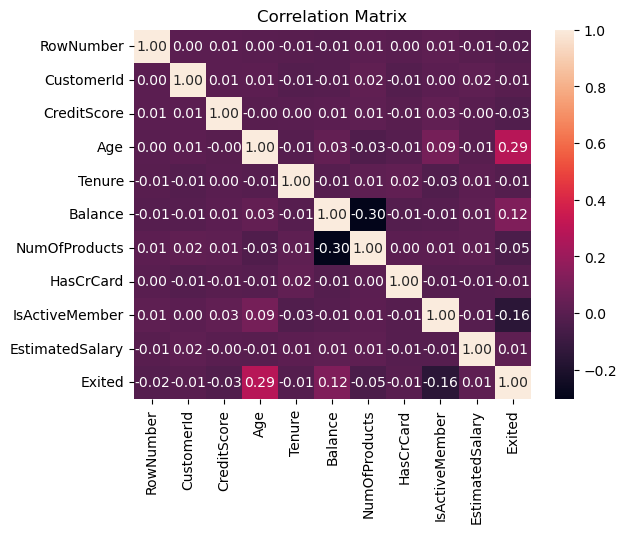

In [102]:
sns.heatmap(df.corr(),annot=True,fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

In [125]:
X = df.drop(columns='Exited')
y = df['Exited']  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)

In [127]:
log_reg = LogisticRegression(random_state=42)
rf = RandomForestClassifier(random_state=42)

In [129]:
log_reg.fit(X_train, y_train)

C:\Users\Aditya\anaconda0.2\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=42)

In [131]:
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [133]:
svm = SVC(random_state=42)
svm.fit(X_train, y_train)

SVC(random_state=42)

In [135]:
models = {
    'Logistic Regression': log_reg,
    'Random Forest': rf,
    'Support Vector Machine': svm
}

for model_name, model in models.items():
    y_pred = model.predict(X_test)
    print(f"\n{model_name}:")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print(f"\n{'='*30}\n")


Logistic Regression:
[[2389    0]
 [ 611    0]]
              precision    recall  f1-score   support

           0       0.80      1.00      0.89      2389
           1       0.00      0.00      0.00       611

    accuracy                           0.80      3000
   macro avg       0.40      0.50      0.44      3000
weighted avg       0.63      0.80      0.71      3000

Accuracy: 0.7963333333333333



Random Forest:
[[2298   91]
 [ 330  281]]
              precision    recall  f1-score   support

           0       0.87      0.96      0.92      2389
           1       0.76      0.46      0.57       611

    accuracy                           0.86      3000
   macro avg       0.81      0.71      0.74      3000
weighted avg       0.85      0.86      0.85      3000

Accuracy: 0.8596666666666667




C:\Users\Aditya\anaconda0.2\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Aditya\anaconda0.2\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Aditya\anaconda0.2\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))



Support Vector Machine:
[[2389    0]
 [ 611    0]]
              precision    recall  f1-score   support

           0       0.80      1.00      0.89      2389
           1       0.00      0.00      0.00       611

    accuracy                           0.80      3000
   macro avg       0.40      0.50      0.44      3000
weighted avg       0.63      0.80      0.71      3000

Accuracy: 0.7963333333333333




C:\Users\Aditya\anaconda0.2\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Aditya\anaconda0.2\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Aditya\anaconda0.2\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [143]:
rf_best = RandomForestClassifier(
    max_depth=20,
    max_features=4,
    min_samples_leaf=1,
    min_samples_split=5,
    n_estimators=100,
    random_state=42
)

# Train the model
rf_best.fit(X_train, y_train)

RandomForestClassifier(max_depth=20, max_features=4, min_samples_split=5,
                       random_state=42)

In [145]:
y_pred_rf_best = rf_best.predict(X_test)

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_rf_best))

print("\nClassification Report:")
print(classification_report(y_test, y_pred_rf_best))

print("Accuracy:", accuracy_score(y_test, y_pred_rf_best))

Confusion Matrix:
[[2294   95]
 [ 330  281]]

Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.96      0.92      2389
           1       0.75      0.46      0.57       611

    accuracy                           0.86      3000
   macro avg       0.81      0.71      0.74      3000
weighted avg       0.85      0.86      0.84      3000

Accuracy: 0.8583333333333333


In [147]:
cv_scores_rf_best = cross_val_score(rf_best, X_train, y_train, cv=5)
print("Random Forest Cross-Validation Accuracy:", cv_scores_rf_best.mean())

Random Forest Cross-Validation Accuracy: 0.8414285714285714


In [153]:
pip install yellowbrick

   ---------------------------------------- 0.0/282.6 kB ? eta -:--:--
   - -------------------------------------- 10.2/282.6 kB ? eta -:--:--
   ----- --------------------------------- 41.0/282.6 kB 388.9 kB/s eta 0:00:01
   -------- ------------------------------ 61.4/282.6 kB 544.7 kB/s eta 0:00:01
   ------------ -------------------------- 92.2/282.6 kB 581.0 kB/s eta 0:00:01
   ----------------- -------------------- 133.1/282.6 kB 561.1 kB/s eta 0:00:01
   -------------------- ----------------- 153.6/282.6 kB 654.6 kB/s eta 0:00:01
   ----------------------- -------------- 174.1/282.6 kB 551.6 kB/s eta 0:00:01
   ------------------------------- ------ 235.5/282.6 kB 654.9 kB/s eta 0:00:01
   -------------------------------------- 282.6/282.6 kB 696.6 kB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


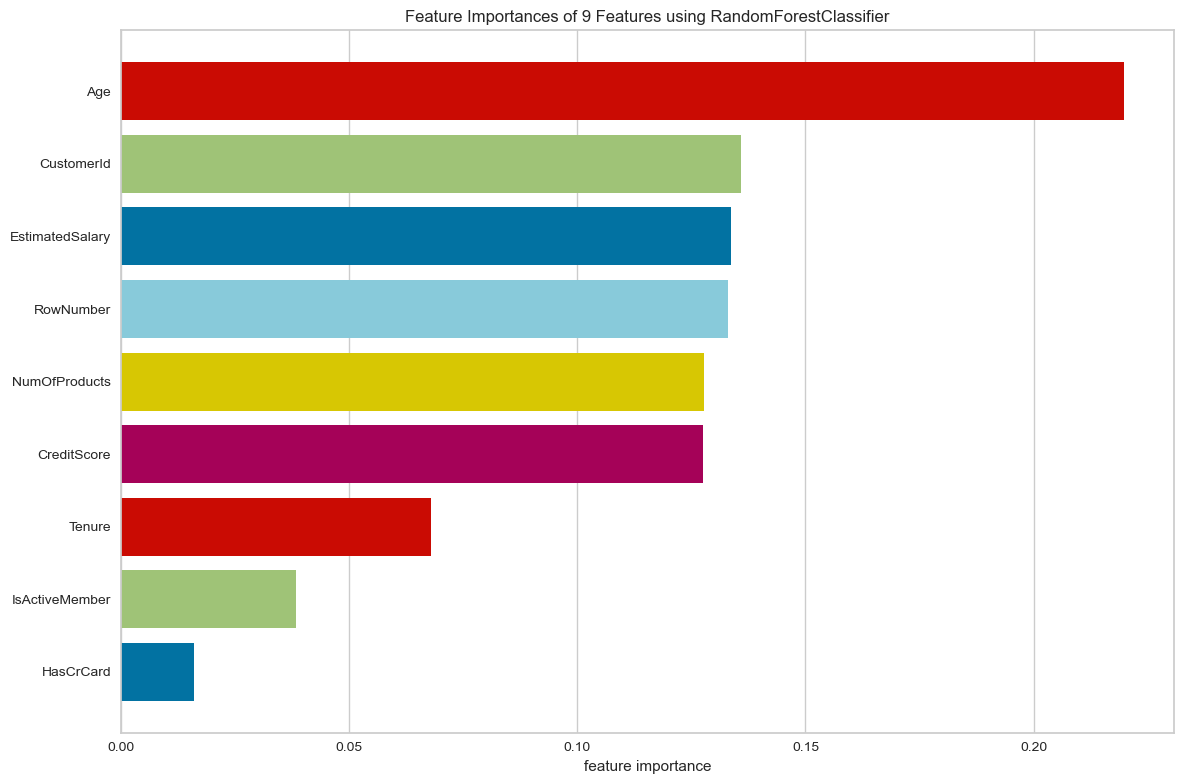

<Axes: title={'center': 'Feature Importances of 9 Features using RandomForestClassifier'}, xlabel='feature importance'>

In [159]:
from yellowbrick.model_selection import FeatureImportances
fig = plt.figure(figsize = (12,8))
viz = FeatureImportances(RandomForestClassifier(n_estimators=300), labels=df.columns, relative=False)
viz.fit(X_train,y_train)
viz.show()